In [1]:
#importing libraries
import math 
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


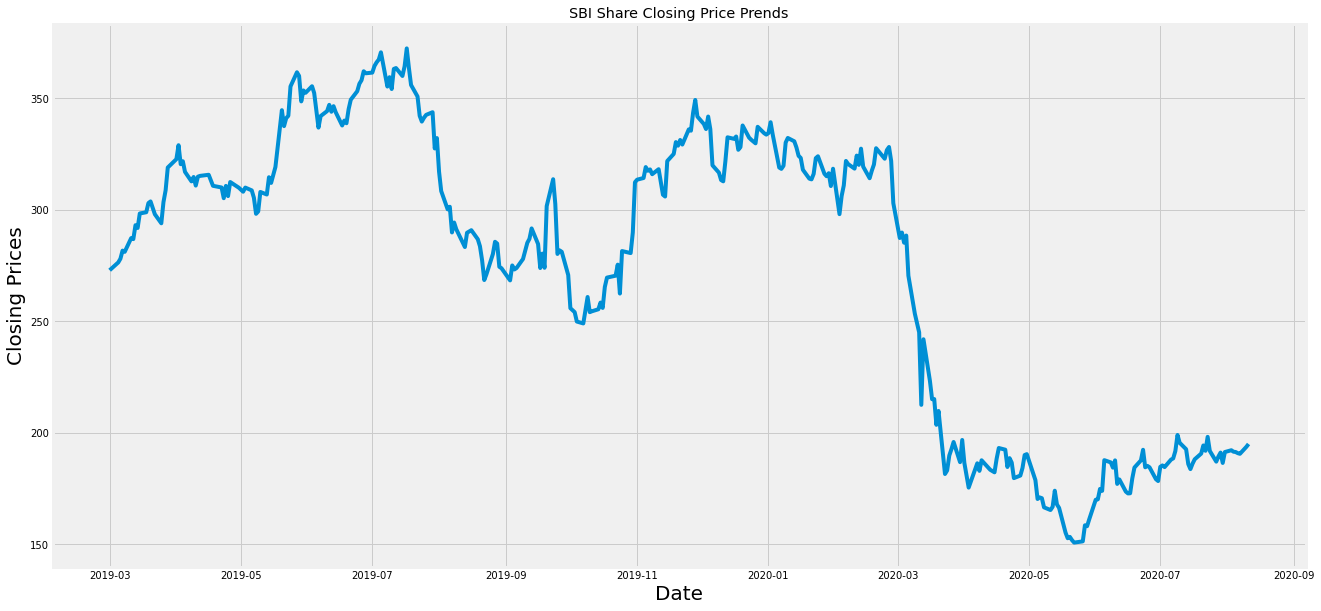

In [2]:
mar= web.DataReader('SBIN.NS', data_source = 'yahoo', start = '2019-03-01', end = '2020-08-10')
mar

plt.figure(figsize=(20,10))
plt.title("SBI Share Closing Price Prends")
plt.plot(mar['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.show()


In [3]:
df = mar['Close']
arr= df.to_numpy()
arr = arr.reshape(-1,1)
leng = len(arr)*0.8
test_len = math.ceil(leng)
test_len

282

In [4]:
#Preprocessing
scaler= MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(arr)
data

array([[0.55111719],
       [0.56691498],
       [0.57436248],
       [0.59083729],
       [0.58835483],
       [0.61611378],
       [0.61408258],
       [0.64229292],
       [0.63665085],
       [0.6659896 ],
       [0.66847219],
       [0.68697806],
       [0.6903633 ],
       [0.66440979],
       [0.64612955],
       [0.68900926],
       [0.71293157],
       [0.7589709 ],
       [0.7758971 ],
       [0.80410744],
       [0.76574138],
       [0.77160908],
       [0.75016922],
       [0.73098619],
       [0.73978787],
       [0.72241028],
       [0.74046489],
       [0.7420447 ],
       [0.7436245 ],
       [0.74430153],
       [0.72195888],
       [0.71857364],
       [0.69690816],
       [0.72173326],
       [0.70119618],
       [0.72963215],
       [0.71812239],
       [0.70999773],
       [0.71834801],
       [0.71270595],
       [0.69781094],
       [0.66531258],
       [0.67005186],
       [0.70954633],
       [0.70435566],
       [0.73933648],
       [0.72782672],
       [0.744

In [5]:
#Create training data set
train_data = data[0:test_len, : ]
#Rest of the data will be used to back test
#splitting the data for training

xtrain = []
ytrain=[]

for i in range(60,len(train_data)):
  xtrain.append(train_data[i-60:i , 0])
  ytrain.append(train_data[i,0])

#Creating numpy arrays for LSTM model
xtrain , ytrain = np.array(xtrain), np.array(ytrain)

xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

xtrain.shape


(222, 60, 1)

In [6]:
#Building LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [8]:
#Compiling
model.compile(optimizer='adam', loss= 'mean_squared_error')


In [9]:
#Training data
model.fit(xtrain, ytrain, batch_size=1, epochs= 1)


222/222 [==============================] - 5s 21ms/step - loss: 0.0187


In [11]:
#Creating test data set
testdata= data[test_len - 60: , : ]
#Creating test datasets
xtest = []
ytest = data[test_len: , :]
for i in range(60, len(testdata)):
  xtest.append(testdata[i-60:i,0])


In [15]:
#Converting to numpy arrays
xtest = np.array(xtest)
xtest.shape
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1],1)
xtest.shape

(70, 60, 1)

In [16]:
#Get the predicted values
fprice = model.predict(xtest)
fprice = scaler.inverse_transform(fprice)


In [18]:
#Model testing
rmse = np.sqrt(np.mean((fprice - ytest)**2))
rmse

186.47832783991237

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


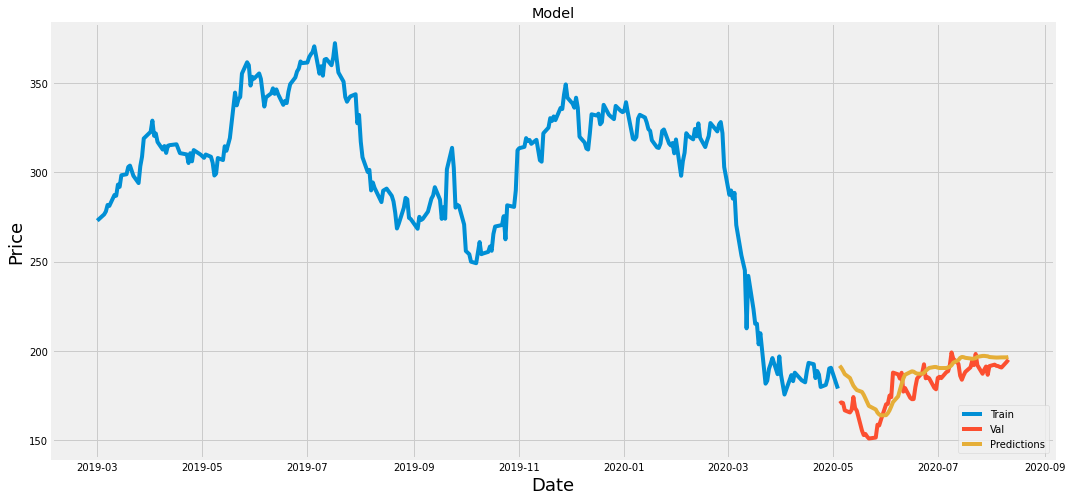

In [27]:
#Plotting 
train = mar[:test_len]
valid = mar[test_len:]
valid['Predictions'] = fprice

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train' , 'Val' , 'Predictions'], loc = 'lower right')
plt.show()

